# Main For Part 1

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import numpy as np
from matplotlib import pyplot as plt
# Needed for training
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import random_split, DataLoader
from torch.utils.data.dataset import Subset
# Models
from models_part1 import FinalClassifier , MNISTAutoencoder, CIFAR10Autoencoder
from models_testing import  plot_accuracies,plot_losses,test_classifier,test_classifyingAutoEncoder
from models_testing import create_model_folders,PretrainedModel,save_pretrained_model
%load_ext autoreload
%autoreload 2

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [13]:
base_path = 'trained_models/part_1/'

# MNIST

# Preparing Data

In [6]:
mnist_path = "./mnist_data"

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = torchvision.datasets.MNIST(
    root=mnist_path,  
    train=True,       
    transform=transform,  # Apply transformations here
    download=True     
)

test_dataset = torchvision.datasets.MNIST(
    root=mnist_path,
    train=False,  
    transform=transform,  # Apply same transformations for test data
    download=True
)

print("MNIST dataset downloaded successfully!")

MNIST dataset downloaded successfully!


In [7]:
train_size = 50_000
val_size = 10_000

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

print(f"Train size: {len(train_dataset)}, Validation size: {len(val_dataset)}, Test size: {len(test_dataset)}")


batch_size = 64

# Create DataLoaders
mnist_train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
mnist_val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
mnist_test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders created successfully!")

images, labels = next(iter(mnist_train_loader))
print(f"Batch shape: {images.shape}, Labels: {labels[:5]}")

Train size: 50000, Validation size: 10000, Test size: 10000
DataLoaders created successfully!
Batch shape: torch.Size([64, 1, 28, 28]), Labels: tensor([1, 6, 6, 0, 8])


# Experiment

In [8]:
# Model initialization
model = MNISTAutoencoder(latent_dim=128).to(device)

train_losses,val_losses = model.train_autoencoder(train_loader= mnist_train_loader,
                       val_loader=mnist_val_loader,
                       num_epochs=40,
                       learning_rate=1e-3,
                       weight_decay= 1e-3)

Epoch [1/40], Time: 19.49s, Train Loss: 0.0989, Val Loss: 0.0362, LR: 0.0010000
Epoch [2/40], Time: 10.74s, Train Loss: 0.0432, Val Loss: 0.0313, LR: 0.0010000
Epoch [3/40], Time: 11.24s, Train Loss: 0.0398, Val Loss: 0.0291, LR: 0.0010000
Epoch [4/40], Time: 10.78s, Train Loss: 0.0381, Val Loss: 0.0280, LR: 0.0010000
Epoch [5/40], Time: 10.28s, Train Loss: 0.0371, Val Loss: 0.0271, LR: 0.0010000
Epoch [6/40], Time: 9.98s, Train Loss: 0.0362, Val Loss: 0.0261, LR: 0.0010000
Epoch [7/40], Time: 10.42s, Train Loss: 0.0354, Val Loss: 0.0256, LR: 0.0010000
Epoch [8/40], Time: 10.12s, Train Loss: 0.0348, Val Loss: 0.0249, LR: 0.0010000
Epoch [9/40], Time: 10.25s, Train Loss: 0.0343, Val Loss: 0.0246, LR: 0.0010000
Epoch [10/40], Time: 10.82s, Train Loss: 0.0339, Val Loss: 0.0241, LR: 0.0010000
Epoch [11/40], Time: 10.24s, Train Loss: 0.0335, Val Loss: 0.0242, LR: 0.0010000
Epoch [12/40], Time: 10.08s, Train Loss: 0.0331, Val Loss: 0.0238, LR: 0.0010000
Epoch [13/40], Time: 10.31s, Train Los

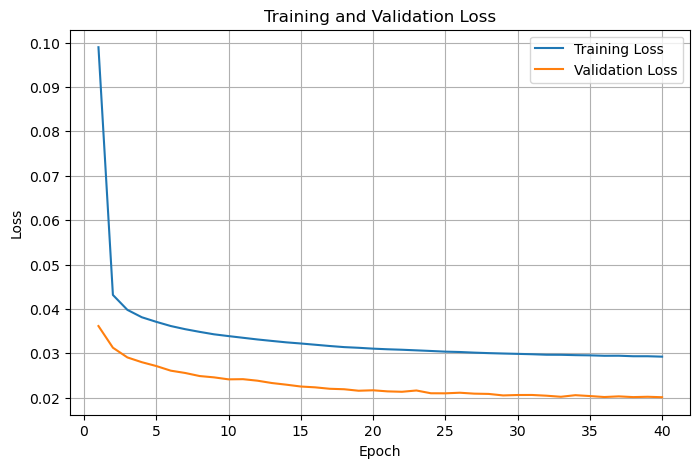

In [9]:
plot_losses(train_losses = train_losses, val_losses = val_losses)

In [10]:
pretrained_encoder = model.encoder
for param in pretrained_encoder.parameters():
    param.requires_grad = False  # Ensure encoder is frozen
classifier = FinalClassifier(latent_dim=128)
train_losses, train_accuracies, val_accuracies = classifier.fit_classifier(encoder = pretrained_encoder,
                                                                           train_loader =  mnist_train_loader,
                                                                           val_loader = mnist_val_loader,
                                                                           num_epochs=30, 
                                                                           learning_rate=1e-3)


Epoch [1/30], Time: 13.08s, Train Loss: 0.2859, Train Accuracy: 91.50%, Val Accuracy: 96.50%, LR: 0.001000
Epoch [2/30], Time: 12.65s, Train Loss: 0.1301, Train Accuracy: 96.05%, Val Accuracy: 97.08%, LR: 0.001000
Epoch [3/30], Time: 12.74s, Train Loss: 0.0926, Train Accuracy: 97.09%, Val Accuracy: 97.67%, LR: 0.001000
Epoch [4/30], Time: 12.37s, Train Loss: 0.0768, Train Accuracy: 97.51%, Val Accuracy: 97.52%, LR: 0.001000
Epoch [5/30], Time: 13.31s, Train Loss: 0.0681, Train Accuracy: 97.76%, Val Accuracy: 97.85%, LR: 0.001000
Epoch [6/30], Time: 13.29s, Train Loss: 0.0568, Train Accuracy: 98.12%, Val Accuracy: 97.77%, LR: 0.001000
Epoch [7/30], Time: 13.28s, Train Loss: 0.0512, Train Accuracy: 98.31%, Val Accuracy: 97.80%, LR: 0.001000
Epoch [8/30], Time: 12.20s, Train Loss: 0.0447, Train Accuracy: 98.51%, Val Accuracy: 97.91%, LR: 0.001000
Epoch [9/30], Time: 12.22s, Train Loss: 0.0438, Train Accuracy: 98.53%, Val Accuracy: 97.94%, LR: 0.001000
Epoch [10/30], Time: 12.18s, Train Lo

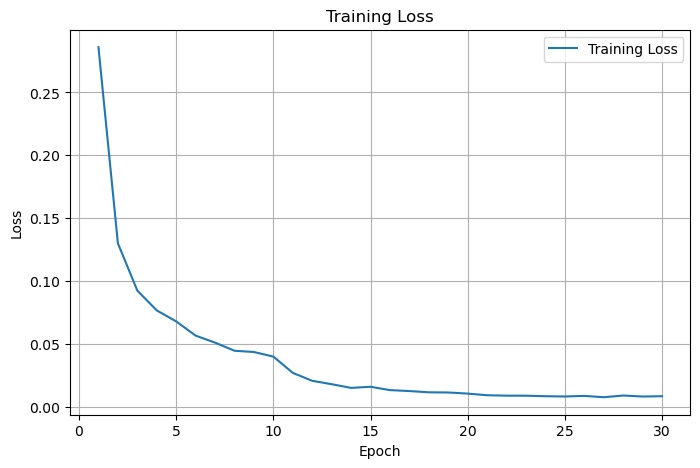

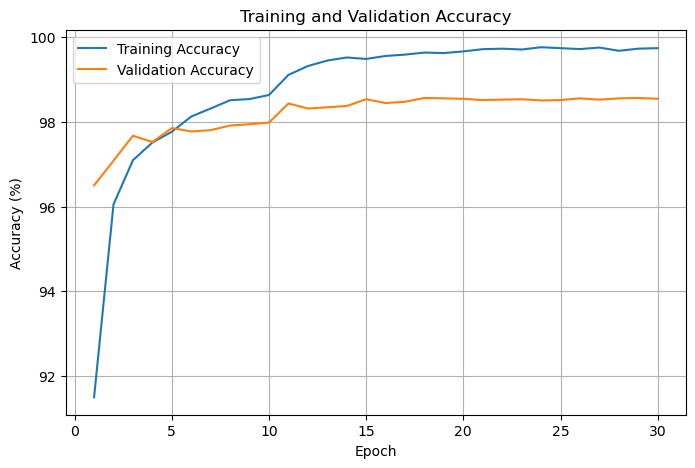

In [11]:
plot_losses(train_losses)
plot_accuracies(train_accuracies, val_accuracies)

In [12]:
test_classifier(encoder=pretrained_encoder,
                classifier=classifier,
                test_loader=mnist_test_loader)

Test Accuracy: 98.55%


## Save model

In [14]:
save_pretrained_model(path = base_path + 'mnist.pth',
                      encoder = model.encoder,
                      classifier = classifier,
                      decoder = model.decoder)

# Cifar10

# Preparing data

In [10]:
cifar10_path = "./cifar10_data"

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

c10_full_train_dataset = torchvision.datasets.CIFAR10(
    root=cifar10_path,  
    train=True,       
    transform=transform,
    download=True     
)

c10_test_dataset = torchvision.datasets.CIFAR10(
    root=cifar10_path,
    train=False,  
    transform=transform,
    download=True
)

print("CIFAR-10 dataset downloaded successfully!")

Files already downloaded and verified
Files already downloaded and verified
CIFAR-10 dataset downloaded successfully!


In [11]:
train_size = 40_000
val_size = 10_000

c10_train_dataset, c10_val_dataset = random_split(c10_full_train_dataset, [train_size, val_size])

# Check dataset sizes
print(f"Train size: {len(c10_train_dataset)}, Validation size: {len(c10_val_dataset)}, Test size: {len(c10_test_dataset)}")

# Define batch size
batch_size = 64

# Create DataLoaders
c10_train_loader = DataLoader(c10_train_dataset, batch_size=batch_size, shuffle=True)
c10_val_loader = DataLoader(c10_val_dataset, batch_size=batch_size, shuffle=False)
c10_test_loader = DataLoader(c10_test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders created successfully!")

# Get a batch of images and labels from the train_loader
images, labels = next(iter(c10_train_loader))
print(f"Batch shape: {images.shape}, Labels (first 5): {labels[:5]}")

Train size: 40000, Validation size: 10000, Test size: 10000
DataLoaders created successfully!
Batch shape: torch.Size([64, 3, 32, 32]), Labels (first 5): tensor([7, 8, 8, 5, 0])


# Experiment

In [12]:
model = CIFAR10Autoencoder(latent_dim=128).to(device)
train_losses,val_losses = model.train_autoencoder(train_loader = c10_train_loader,
                        val_loader = c10_val_loader,
                        num_epochs=40,
                        learning_rate= 1e-3,
                        weight_decay= 1e-3)

Initializing weights ....
Initializing weights DONE
Epoch [1/40], Time: 11.82s, Train Loss: 0.1768, Val Loss: 0.1369, LR: 0.0010000
Epoch [2/40], Time: 11.28s, Train Loss: 0.1305, Val Loss: 0.1172, LR: 0.0010000
Epoch [3/40], Time: 11.40s, Train Loss: 0.1186, Val Loss: 0.1124, LR: 0.0010000
Epoch [4/40], Time: 16.61s, Train Loss: 0.1122, Val Loss: 0.1086, LR: 0.0010000
Epoch [5/40], Time: 15.61s, Train Loss: 0.1078, Val Loss: 0.1032, LR: 0.0010000
Epoch [6/40], Time: 15.10s, Train Loss: 0.1055, Val Loss: 0.1005, LR: 0.0010000
Epoch [7/40], Time: 12.77s, Train Loss: 0.1028, Val Loss: 0.0983, LR: 0.0010000
Epoch [8/40], Time: 11.34s, Train Loss: 0.1015, Val Loss: 0.0982, LR: 0.0010000
Epoch [9/40], Time: 11.42s, Train Loss: 0.1006, Val Loss: 0.0966, LR: 0.0010000
Epoch [10/40], Time: 11.55s, Train Loss: 0.0996, Val Loss: 0.0974, LR: 0.0010000
Epoch [11/40], Time: 11.47s, Train Loss: 0.0993, Val Loss: 0.0962, LR: 0.0010000
Epoch [12/40], Time: 11.37s, Train Loss: 0.0985, Val Loss: 0.0968,

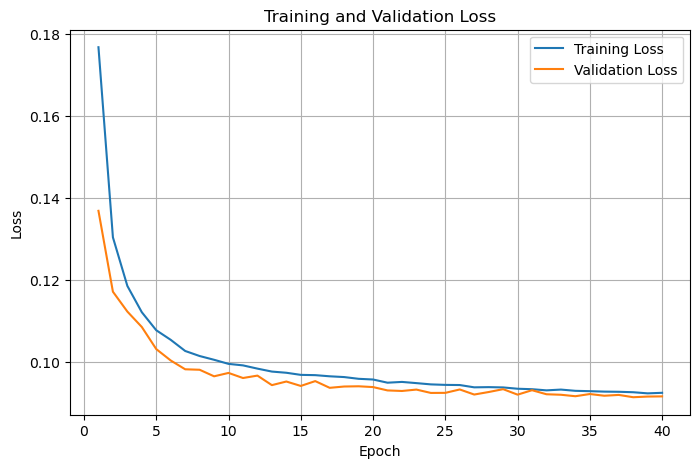

In [13]:
plot_losses(train_losses = train_losses, val_losses = val_losses)

In [14]:
for param in model.encoder.parameters():
    param.requires_grad = False  # Ensure encoder is frozen
pretrained_encoder = model.encoder
classifier = FinalClassifier(latent_dim=128)
train_losses, train_accuracies, val_accuracies = classifier.fit_classifier(encoder = pretrained_encoder,
                                                                           train_loader =  c10_train_loader,
                                                                           val_loader = c10_val_loader,
                                                                           num_epochs=30, 
                                                                           learning_rate=1e-3)

Epoch [1/30], Time: 14.31s, Train Loss: 1.6429, Train Accuracy: 41.73%, Val Accuracy: 49.52%, LR: 0.001000
Epoch [2/30], Time: 14.30s, Train Loss: 1.4301, Train Accuracy: 49.03%, Val Accuracy: 51.81%, LR: 0.001000
Epoch [3/30], Time: 14.20s, Train Loss: 1.3465, Train Accuracy: 51.96%, Val Accuracy: 53.54%, LR: 0.001000
Epoch [4/30], Time: 14.44s, Train Loss: 1.2821, Train Accuracy: 54.27%, Val Accuracy: 53.93%, LR: 0.001000
Epoch [5/30], Time: 13.95s, Train Loss: 1.2299, Train Accuracy: 56.07%, Val Accuracy: 54.60%, LR: 0.001000
Epoch [6/30], Time: 14.98s, Train Loss: 1.1908, Train Accuracy: 57.26%, Val Accuracy: 55.54%, LR: 0.001000
Epoch [7/30], Time: 15.20s, Train Loss: 1.1599, Train Accuracy: 58.76%, Val Accuracy: 55.47%, LR: 0.001000
Epoch [8/30], Time: 13.84s, Train Loss: 1.1286, Train Accuracy: 59.70%, Val Accuracy: 56.37%, LR: 0.001000
Epoch [9/30], Time: 14.03s, Train Loss: 1.0955, Train Accuracy: 60.72%, Val Accuracy: 56.18%, LR: 0.001000
Epoch [10/30], Time: 14.03s, Train Lo

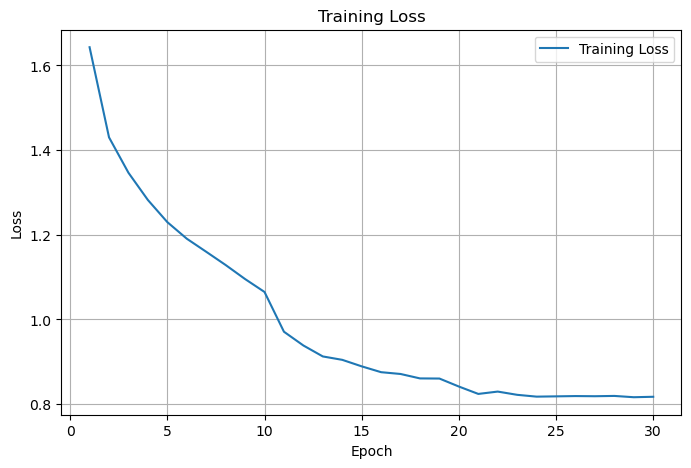

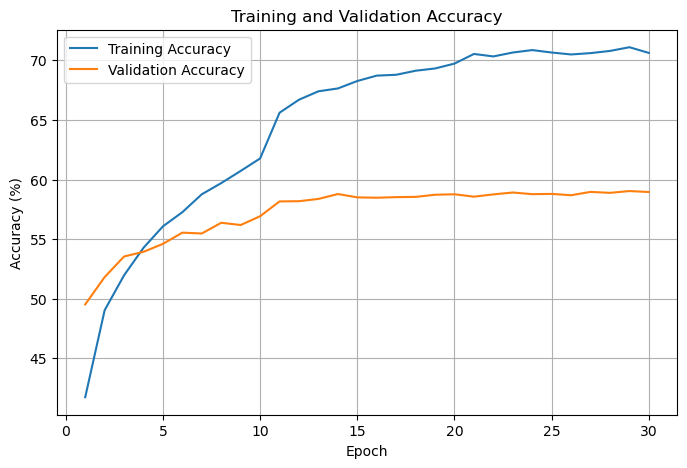

In [15]:
plot_losses(train_losses)
plot_accuracies(train_accuracies, val_accuracies)

In [16]:
test_classifier(encoder=pretrained_encoder,
                classifier=classifier,
                test_loader=c10_test_loader)

Test Accuracy: 58.75%
